In [2]:
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

In [3]:
cData = pd.read_csv("auto-mpg.csv")  

In [4]:
cData

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [5]:
cData.shape

(392, 9)

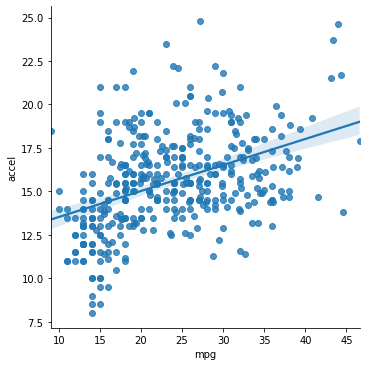

In [6]:
sns.lmplot(x='mpg', y='accel', data=cData) #use fit_reg=False to turn on/off the regression line
plt.show()

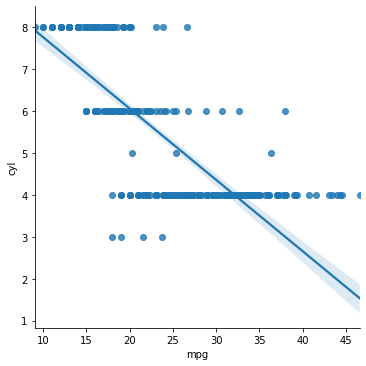

In [7]:
sns.lmplot(x='mpg', y='cyl', data=cData)
plt.show()

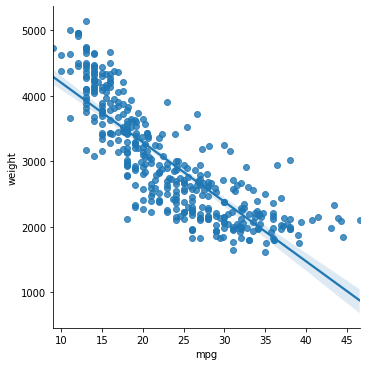

In [8]:
sns.lmplot(x='mpg', y='weight', data=cData)
plt.show()

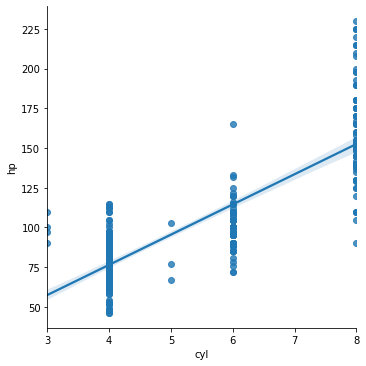

In [9]:
sns.lmplot(x='cyl', y='hp', data=cData)
plt.show()

In [10]:
cData.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [11]:
#dropping/ignoring car_name 
df = cData.drop('name', axis=1)

In [12]:
# Also replacing the categorical var with actual values
df['origin'] = df['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
df.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,america
1,15.0,8,350.0,165,3693,11.5,70,america
2,18.0,8,318.0,150,3436,11.0,70,america
3,16.0,8,304.0,150,3433,12.0,70,america
4,17.0,8,302.0,140,3449,10.5,70,america


Convert Categorical variables to Dummy Variables

This will help us to build our machine learning algorithm since we cannot build our algorithm based on the categorical variables. Computers don't understand.Categorical variables has to be first converted to a numerical variable.

In [13]:
df = pd.get_dummies(df, columns=['origin'])
df

,mpg,cyl,displ,hp,weight,accel,yr,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,0,0
388,44.0,4,97.0,52,2130,24.6,82,0,0,1
389,32.0,4,135.0,84,2295,11.6,82,1,0,0
390,28.0,4,120.0,79,2625,18.6,82,1,0,0


In [14]:
df.isna().sum()

mpg               0
cyl               0
displ             0
hp                0
weight            0
accel             0
yr                0
origin_america    0
origin_asia       0
origin_europe     0
dtype: int64

Dealing with Missing Values

In [15]:
# hp is missing cause it does not seem to be reqcognized as a numerical column!
df.dtypes

mpg               float64
cyl                 int64
displ             float64
hp                  int64
weight              int64
accel             float64
yr                  int64
origin_america      uint8
origin_asia         uint8
origin_europe       uint8
dtype: object

The isdigit() methods returns “True” if all characters in the string are digits, Otherwise, It returns “False”. This function is used to check if the argument contains digits such as : 0123456789

In [16]:
#print isDigit = False!
df['hp'] == False   # from temp take only those rows where hp has false

0      False
1      False
2      False
3      False
4      False
       ...  
387    False
388    False
389    False
390    False
391    False
Name: hp, Length: 392, dtype: bool

In [17]:
df= df.replace('?', np.nan)

In [18]:
df

,mpg,cyl,displ,hp,weight,accel,yr,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,0,0
388,44.0,4,97.0,52,2130,24.6,82,0,0,1
389,32.0,4,135.0,84,2295,11.6,82,1,0,0
390,28.0,4,120.0,79,2625,18.6,82,1,0,0


Handling the missing data

There are various ways to handle missing values. Drop the rows, replace missing values with median values etc. of the 398 rows 6 have NAN in the hp column. We could drop those 6 rows - which might not be a good idea under all situations

In [19]:
cData.median()

mpg         22.75
cyl          4.00
displ      151.00
hp          93.50
weight    2803.50
accel       15.50
yr          76.00
origin       1.00
dtype: float64

In [20]:
#Replacing the missing values with the median of each column(if any)

df = df.fillna(df.median())

#Alternatively

# medianFiller = lambda x: x.fillna(x.median())
# cData = cData.apply(medianFiller,axis=0)

In [21]:
#converting the hp column to float
df['hp'] = df['hp'].astype('float64')

In [22]:
df.dtypes

mpg               float64
cyl                 int64
displ             float64
hp                float64
weight              int64
accel             float64
yr                  int64
origin_america      uint8
origin_asia         uint8
origin_europe       uint8
dtype: object

BiVariate Plots

A bivariate analysis among the different variables can be done using scatter matrix plot. Seaborn libs create a dashboard reflecting useful information about the dimensions. The result can be stored as a .png file.

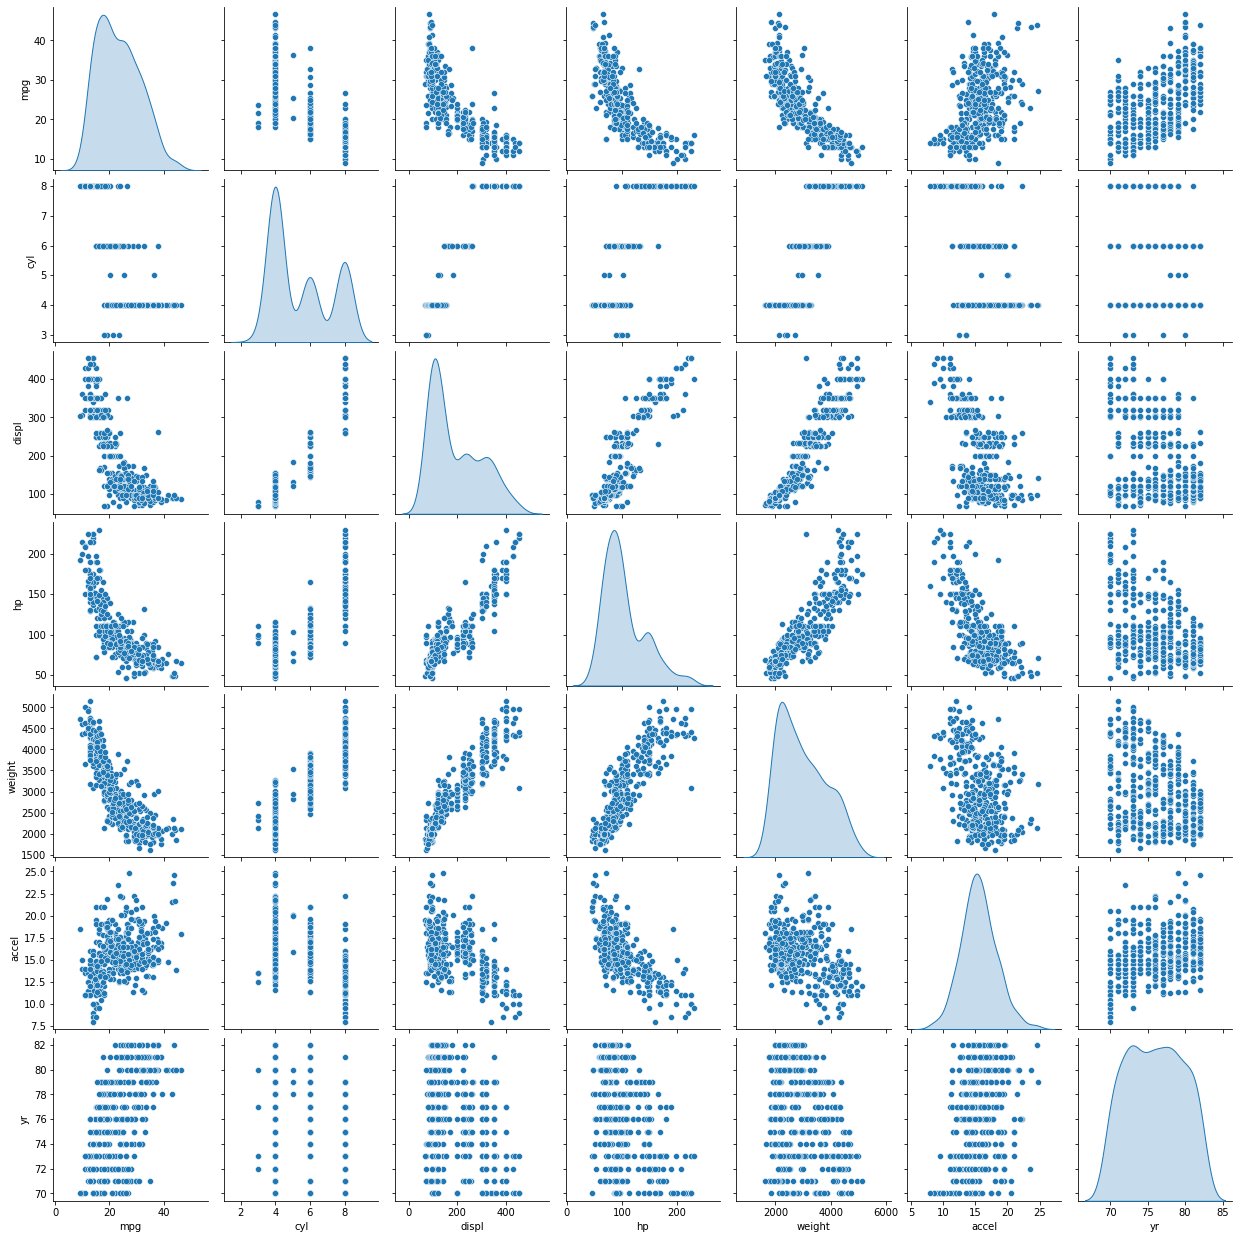

In [23]:
attr_select = df.iloc[:, 0:7]
sns.pairplot(attr_select, diag_kind='kde')   # kde is help plot density curve instead of histogram on the diag

Observation between 'mpg' and other attributes indicate the relationship is not really linear. However, the plots also indicate that linearity would still capture quite a bit of useful information/pattern. Several assumptions of classical linear regression seem to be violated, including the assumption of no Heteroscedasticity.

Building Our Linear Model

Divide Data into dependent and independent variables

In [24]:
df.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0


In [25]:
# independent variables
X = df.drop(['mpg','origin_europe'], axis=1)
# dependent variable
y = df[['mpg']]

In [26]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

Fit Linear Model (make our model learn)

In [27]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [28]:
regression_model.coef_

array([[-2.32509254e-01,  2.45825956e-02, -1.48890324e-03,
        -7.61188242e-03,  2.80132661e-01,  7.74684971e-01,
        -2.59904083e+00,  1.21355105e-01]])

Here are the coefficients for each variable and the intercept

In [29]:
for indx, col_name in enumerate(X_train.columns):
    print("Coefficient of {} is {}".format(col_name, regression_model.coef_[0][indx]))

Coefficient of cyl is -0.23250925374175832
Coefficient of displ is 0.024582595649820696
Coefficient of hp is -0.001488903236772617
Coefficient of weight is -0.007611882424290457
Coefficient of accel is 0.2801326608622854
Coefficient of yr is 0.7746849712944153
Coefficient of origin_america is -2.5990408304251593
Coefficient of origin_asia is 0.12135510539386625


In [30]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -18.924995881633254


The score (R^2) for in-sample and out of sample

In [31]:
regression_model.score(X_train, y_train)

0.8205337631867142

In [32]:
#out of sample score (R^2)

regression_model.score(X_test, y_test)

0.8242172817490034

In [33]:
X_test

,cyl,displ,hp,weight,accel,yr,origin_america,origin_asia
81,4,120.0,97.0,2506,14.5,72,0,1
165,4,97.0,75.0,2171,16.0,75,0,1
351,4,108.0,75.0,2350,16.8,81,0,1
119,4,121.0,112.0,2868,15.5,73,0,0
379,4,91.0,67.0,1995,16.2,82,0,1
...,...,...,...,...,...,...,...,...
59,4,140.0,90.0,2408,19.5,72,1,0
12,8,400.0,150.0,3761,9.5,70,1,0
303,4,151.0,90.0,2670,16.0,79,1,0
163,8,262.0,110.0,3221,13.5,75,1,0


In [34]:
regression_model.predict(X_test)

array([[23.83567423],
       [28.59726492],
       [32.37736248],
       [22.01588437],
       [35.28019321],
       [28.14163774],
       [26.55945716],
       [12.57219984],
       [25.63744107],
       [32.0953011 ],
       [23.40186073],
       [32.21377673],
       [20.20455071],
       [31.80347979],
       [29.52579591],
       [14.74734514],
       [29.86523971],
       [33.12612966],
       [11.05583483],
       [23.03764967],
       [27.03713766],
       [17.98215689],
       [17.970493  ],
       [16.10744901],
       [10.85311295],
       [20.09330878],
       [31.84106862],
       [18.50652465],
       [21.76656008],
       [28.94836323],
       [21.95017154],
       [24.40318225],
       [10.27943191],
       [28.67974388],
       [20.91743998],
       [14.33883247],
       [17.08346441],
       [21.499123  ],
       [35.17239049],
       [24.59637251],
       [16.31300567],
       [11.94917488],
       [22.42178229],
       [22.36191917],
       [22.15963237],
       [18